[['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
 ['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
 ['1' '1' 'S' '0' '0' '0' '0' 'G' '1' '1' '1']
 ['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
 ['1' '1' '0' '1' '1' '1' '1' '1' '0' '1' '1']
 ['1' '1' '0' '1' '0' '0' '0' '1' '0' '1' '1']
 ['1' '1' '0' '1' '0' '0' '0' '1' '0' '1' '1']
 ['1' '1' '0' '0' '0' '0' '0' '0' '0' '1' '1']
 ['1' '1' '0' '0' '0' '0' '0' '0' '0' '1' '1']
 ['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
 ['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']]



  0%|          | 0/1 [00:00<?, ?it/s]

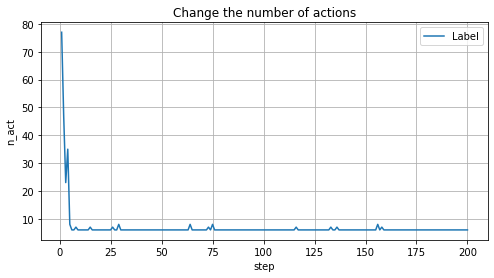

Finish


In [ ]:
from environment import Maze
from agent import Agent
from tqdm.notebook import tqdm 

def train():
    kernel = 2 # Thickness of the outer wall of the maze (extension)
    start = [1, 1] # Specify the start position
#     goal = [4, 4] # Specify the goal position
    goal = [1, 6]

    """Automatically generate a maze"""
    env = Maze(7, 7) # Specify the size of the maze
    env.set_out_wall() # Surround the maze with walls
    #env.set_inner_wall_boutaosi() # Automatically generate inner walls
    env.set_start_goal(start, goal) # Specify start and goal positions
    env.bg_maze(kernel) # Expand the maze grid by kernel amount

    """Generate an agent in the environment and train"""
    n = 1 # Number of episode trials
    episode_count = 200 # Number of episodes
    for e in tqdm(range(1, n+1)):
        epsilon = 0.1
        agent = Agent(env.maze)
        env.run(agent, e, episode_count)
    print('Finish')

if __name__ == "__main__":
    train()

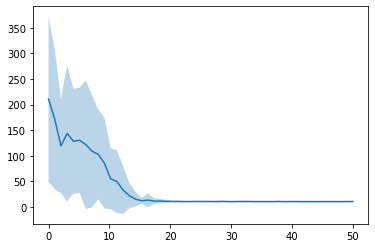

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
a_cnt_all = []

for i in range(1, 51):
    df = pd.read_csv('sampleNMV_(7,7)-'+str(i)+'.csv')
    df = df[df['reward'] == 1]
    df = df['a_cnt']
    df = np.array(df)
    a_cnt_all.append(df)
# Display the DataFrame
# print(np.array(a_cnt_all))
ave_vl = np.mean(a_cnt_all, axis=0)
sigma_vl = np.std(a_cnt_all, axis=0)

x = np.linspace(0, 50)
plt.plot(x, ave_vl)
plt.fill_between(x, ave_vl+sigma_vl, ave_vl-sigma_vl, alpha=0.3)

df = pd.DataFrame(list(zip(ave_vl, ave_vl+sigma_vl, ave_vl-sigma_vl)), columns=['mean', '+', '-'])
df.to_csv('steps_VL_(7,7).csv', index=False)

### Red：V-Learning、緑：VTileNet

### (7,7) maze

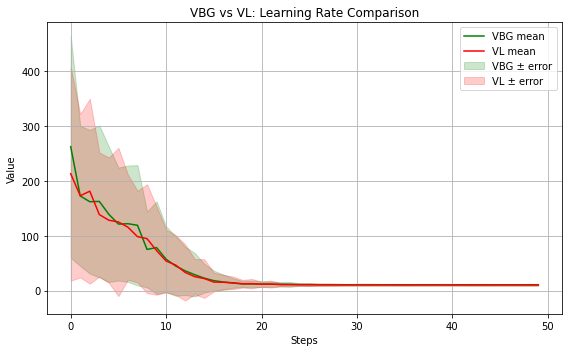

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ==== Data loading (VBG) ====
file_path = 'steps_VL_(7,7).csv'
mean1 = pd.read_csv(file_path, usecols=['mean']).squeeze()
plus1 = pd.read_csv(file_path, usecols=['+']).squeeze()
minus1 = pd.read_csv(file_path, usecols=['-']).squeeze()

# ==== Data loading (VL) ====
file_path = 'VBG_(7,7).csv'
mean2 = pd.read_csv(file_path, usecols=['mean']).squeeze()
plus2 = pd.read_csv(file_path, usecols=['+']).squeeze()
minus2 = pd.read_csv(file_path, usecols=['-']).squeeze()

x = np.arange(len(mean1))  # Automatically generated based on data length
plt.figure(figsize=(8, 5))

# VBG
plt.fill_between(x, plus1.to_numpy(), minus1.to_numpy(), alpha=0.2, color='green', label='VBG ± error')
plt.plot(x, mean1.to_numpy(), color='green', label='VBG mean')

# VL
plt.fill_between(x, plus2.to_numpy(), minus2.to_numpy(), alpha=0.2, color='red', label='VL ± error')
plt.plot(x, mean2.to_numpy(), color='red', label='VL mean')

plt.title('VBG vs VL: Learning Rate Comparison')
plt.xlabel('Steps')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig('VL_VBG_Learning_Rate_comparison.svg')
plt.show()

### (1, 6) maze

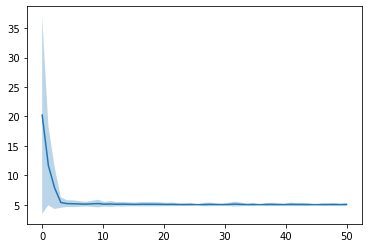

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
a_cnt_all = []

for i in range(1, 201):
    df = pd.read_csv('sampleNMV_(1,6)-'+str(i)+'.csv')
    df = df[df['reward'] == 1]
    df = df['a_cnt']
    df = np.array(df)
    a_cnt_all.append(df)
# Display the DataFrame
# print(np.array(a_cnt_all))
ave_vl = np.mean(a_cnt_all, axis=0)
sigma_vl = np.std(a_cnt_all, axis=0)

x = np.linspace(0, 50)
plt.plot(x, ave_vl)
plt.fill_between(x, ave_vl+sigma_vl, ave_vl-sigma_vl, alpha=0.3)

df = pd.DataFrame(list(zip(ave_vl, ave_vl+sigma_vl, ave_vl-sigma_vl)), columns=['mean', '+', '-'])
df.to_csv('steps_VL_(1,6).csv', index=False)

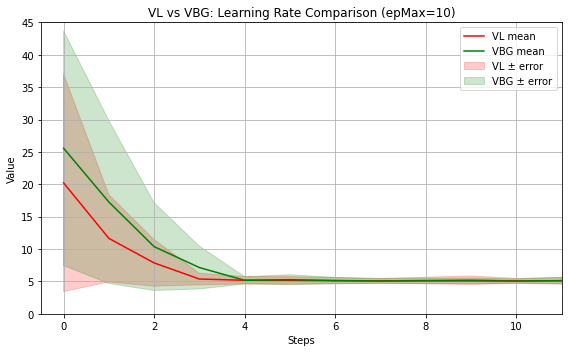

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ==== Data loading (VL) ====
file_path = 'steps_VL_(1,6).csv'
mean1 = pd.read_csv(file_path, usecols=['mean']).squeeze()
plus1 = pd.read_csv(file_path, usecols=['+']).squeeze()
minus1 = pd.read_csv(file_path, usecols=['-']).squeeze()

# ==== Data loading (VBG) ====
file_path = 'VBG_(1,6).csv'
mean2 = pd.read_csv(file_path, usecols=['mean']).squeeze()
plus2 = pd.read_csv(file_path, usecols=['+']).squeeze()
minus2 = pd.read_csv(file_path, usecols=['-']).squeeze()

x = np.arange(len(mean1))
plt.figure(figsize=(8, 5))

# VL
plt.fill_between(x, plus1.to_numpy(), minus1.to_numpy(), alpha=0.2, color='red', label='VL ± error')
plt.plot(x, mean1.to_numpy(), color='red', label='VL mean')

# VBG
plt.fill_between(x, plus2.to_numpy(), minus2.to_numpy(), alpha=0.2, color='green', label='VBG ± error')
plt.plot(x, mean2.to_numpy(), color='green', label='VBG mean')

plt.title('VL vs VBG: Learning Rate Comparison (epMax=10)')
plt.xlabel('Steps')
plt.ylabel('Value')
plt.xlim(-0.5, 11)
plt.ylim(0, 45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig('VL_VBG_Learning_Rate_comparison_epMax=10.svg')
plt.show()